In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns


In [2]:
churn = pd.read_csv("/content/sample_data/churn.csv")

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# tenure
# Contract
# PaymentMethod ,MonthlyCharges
# SeniorCitizen, Partner, Dependents
# InternetService, TechSupport, StreamingTV, StreamingMovies,Churn ,TotalCharges

In [6]:
churn = churn[['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn', 'TotalCharges']]
churn

,tenure,Contract,PaymentMethod,MonthlyCharges,SeniorCitizen,Partner,Dependents,InternetService,TechSupport,StreamingTV,StreamingMovies,Churn,TotalCharges
0,1,Month-to-month,Electronic check,29.85,0,Yes,No,DSL,No,No,No,No,29.85
1,34,One year,Mailed check,56.95,0,No,No,DSL,No,No,No,No,1889.5
2,2,Month-to-month,Mailed check,53.85,0,No,No,DSL,No,No,No,Yes,108.15
3,45,One year,Bank transfer (automatic),42.30,0,No,No,DSL,Yes,No,No,No,1840.75
4,2,Month-to-month,Electronic check,70.70,0,No,No,Fiber optic,No,No,No,Yes,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,One year,Mailed check,84.80,0,Yes,Yes,DSL,Yes,Yes,Yes,No,1990.5
7039,72,One year,Credit card (automatic),103.20,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,7362.9
7040,11,Month-to-month,Electronic check,29.60,0,Yes,Yes,DSL,No,No,No,No,346.45
7041,4,Month-to-month,Mailed check,74.40,1,Yes,No,Fiber optic,No,No,No,Yes,306.6


In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   Contract         7043 non-null   object 
 2   PaymentMethod    7043 non-null   object 
 3   MonthlyCharges   7043 non-null   float64
 4   SeniorCitizen    7043 non-null   int64  
 5   Partner          7043 non-null   object 
 6   Dependents       7043 non-null   object 
 7   InternetService  7043 non-null   object 
 8   TechSupport      7043 non-null   object 
 9   StreamingTV      7043 non-null   object 
 10  StreamingMovies  7043 non-null   object 
 11  Churn            7043 non-null   object 
 12  TotalCharges     7043 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 715.4+ KB


In [8]:
objects = []
ints = []
floats = []
for i in churn.columns:
  if churn[i].dtype == 'object':
    objects.append(i)
  if churn[i].dtype == 'int64':
    ints.append(i)
  if churn[i].dtype == 'float64':
    floats.append(i)


In [9]:
for i in objects:
  print(f'{i}:', churn[i].nunique())
  print(f'{i}:', churn[i].unique())
for i in ints:
  print(f'{i}:', churn[i].nunique())
  print(f'{i}:', churn[i].unique())
for i in floats:
  print(f'{i}:', churn[i].nunique())
  print(f'{i}:', churn[i].unique())

Contract: 3
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: 4
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Partner: 2
Partner: ['Yes' 'No']
Dependents: 2
Dependents: ['No' 'Yes']
InternetService: 3
InternetService: ['DSL' 'Fiber optic' 'No']
TechSupport: 3
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: 3
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: 3
StreamingMovies: ['No' 'Yes' 'No internet service']
Churn: 2
Churn: ['No' 'Yes']
TotalCharges: 6531
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
tenure: 73
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
SeniorCitizen: 2
SeniorCitizen: [0 1]
MonthlyCharges: 1585
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


In [10]:
for i in objects:
  print(f'{i}:', churn[i].isnull().value_counts())

for i in ints:
  print(f'{i}:', churn[i].isnull().value_counts())

for i in floats:
  print(f'{i}:', churn[i].isnull().value_counts())


Contract: Contract
False    7043
Name: count, dtype: int64
PaymentMethod: PaymentMethod
False    7043
Name: count, dtype: int64
Partner: Partner
False    7043
Name: count, dtype: int64
Dependents: Dependents
False    7043
Name: count, dtype: int64
InternetService: InternetService
False    7043
Name: count, dtype: int64
TechSupport: TechSupport
False    7043
Name: count, dtype: int64
StreamingTV: StreamingTV
False    7043
Name: count, dtype: int64
StreamingMovies: StreamingMovies
False    7043
Name: count, dtype: int64
Churn: Churn
False    7043
Name: count, dtype: int64
TotalCharges: TotalCharges
False    7043
Name: count, dtype: int64
tenure: tenure
False    7043
Name: count, dtype: int64
SeniorCitizen: SeniorCitizen
False    7043
Name: count, dtype: int64
MonthlyCharges: MonthlyCharges
False    7043
Name: count, dtype: int64


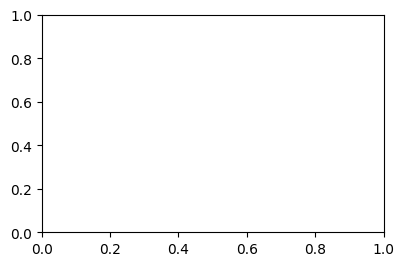

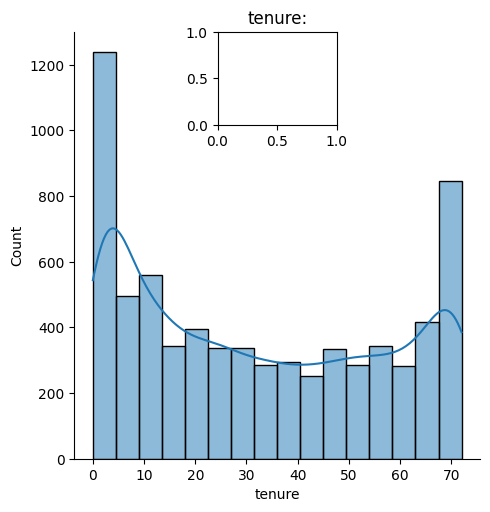

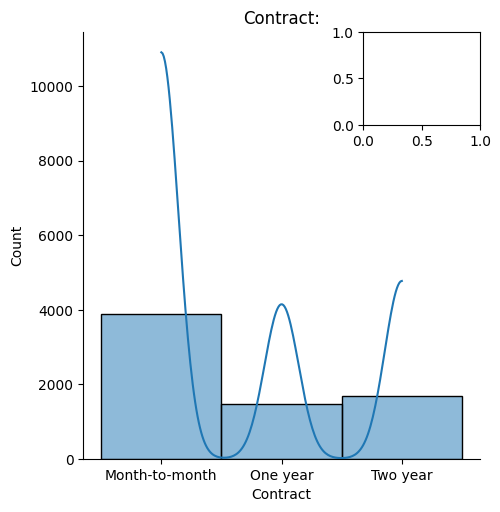

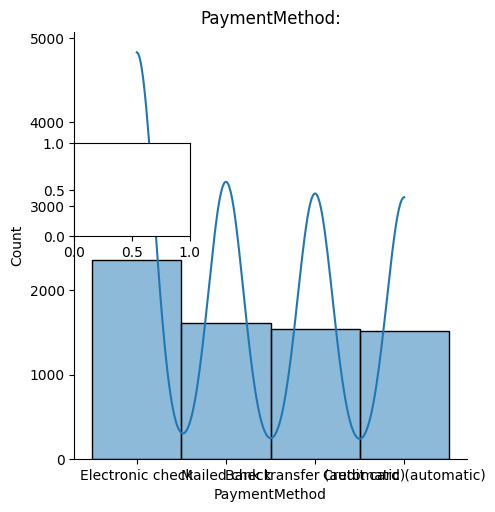

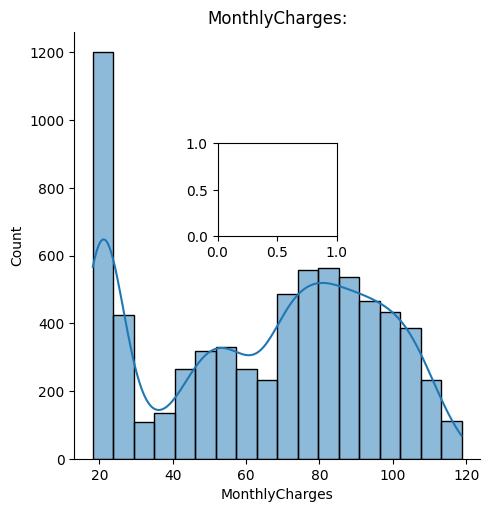

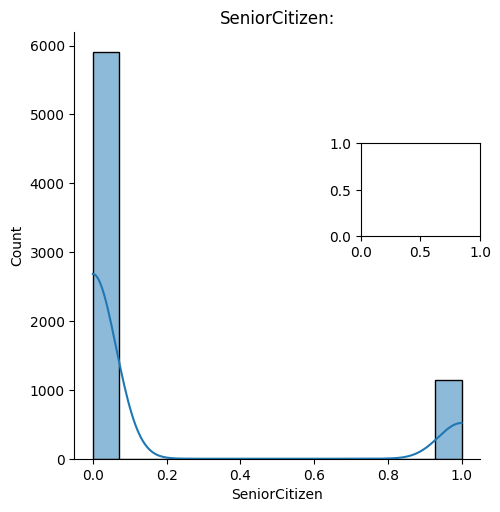

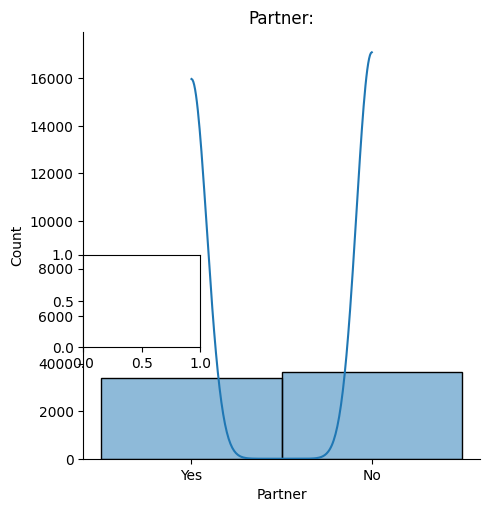

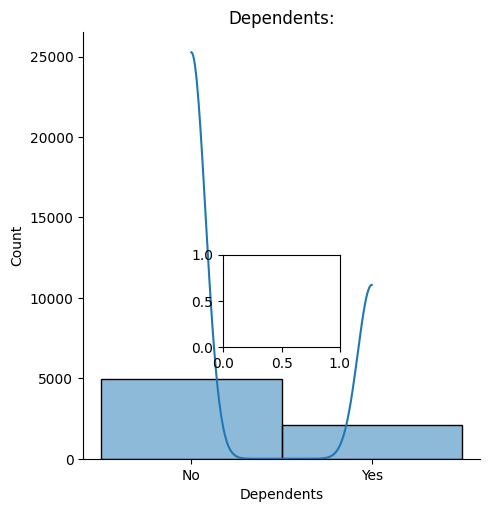

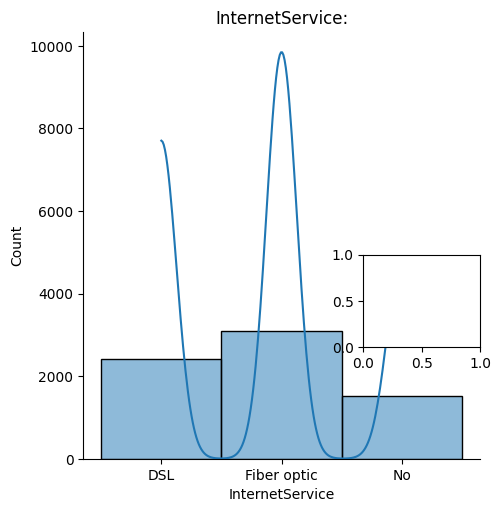

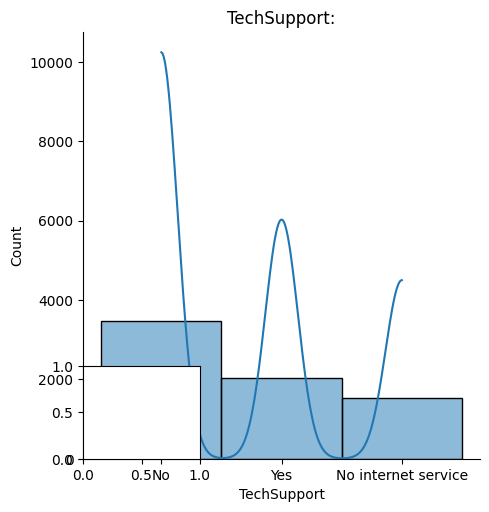

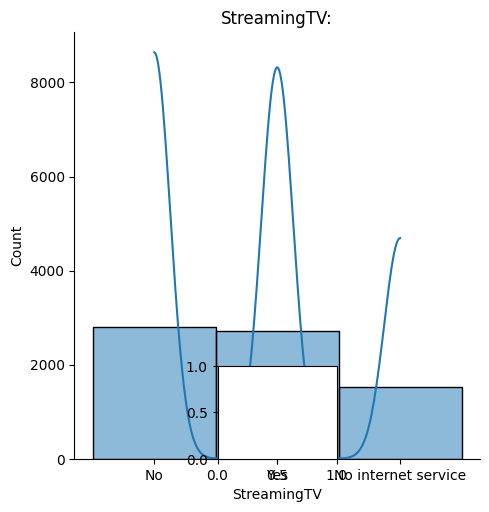

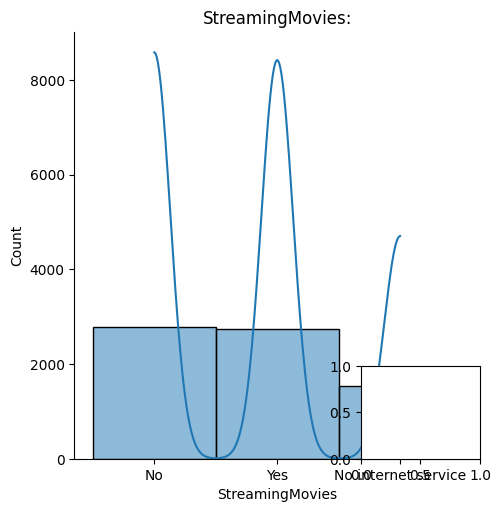

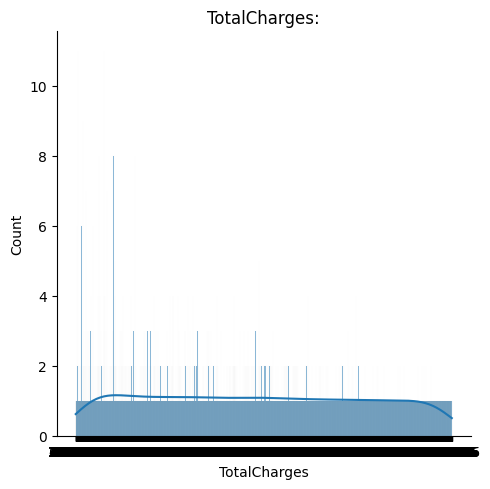

In [11]:
feature = ['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges']
target = ['Churn']
plt.figure(figsize=(15,13))
for i, col in enumerate(feature):
  plt.subplot(4,3,i+1)
  sns.displot(churn[col], kde=True)
  plt.title(f'{col}:')
plt.tight_layout()
plt.show()

In [13]:
#ordinal encoding ------>    contract ,
#ohe --------------> PaymentMethod , Partner, Dependents, InternetService, TechSupport, StreamingTV, StreamingMovies,
# labelEncoding ---------> churn

In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [15]:
oe = OrdinalEncoder()
ohe = OneHotEncoder(sparse_output= False)
le = LabelEncoder()
churn['Contract'] = oe.fit_transform(churn[['Contract']])
features = ['PaymentMethod' , 'Partner', 'Dependents', 'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i, col in enumerate(features):
  churn[col] = ohe.fit_transform(churn[[col]])
churn['Churn'] = le.fit_transform(churn[['Churn']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

tenure: 0.2395397495619829
tenure: 7043
Contract: 0.6309590983751753
Contract: 0
PaymentMethod: 1.3576051920543004
PaymentMethod: 0
MonthlyCharges: -0.22052443394398033
MonthlyCharges: 7043
SeniorCitizen: 1.8336327440928564
SeniorCitizen: 0
Partner: -0.06792238342634195
Partner: 7043
Dependents: -0.8751985772997152
Dependents: 0
InternetService: 0.6581125723778607
InternetService: 0
TechSupport: 0.0275535616418117
TechSupport: 7043
StreamingTV: 0.41268636115076107
StreamingTV: 7043
StreamingMovies: 0.427838466339613
StreamingMovies: 7043
TotalCharges: 0.961642499724251
TotalCharges: 0


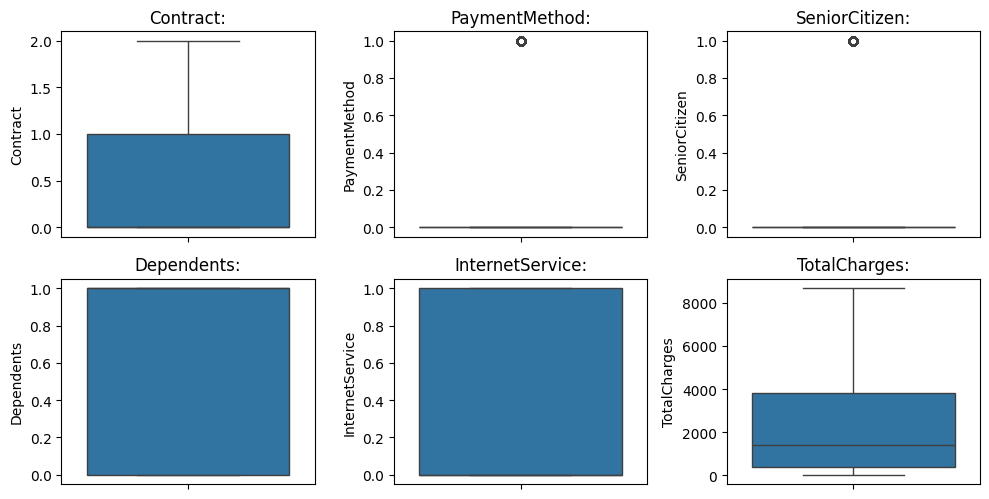

In [22]:
df = churn.drop(columns=['Churn'],axis=1)
skewness = {}
percentile1 = {}
percentile3 = {}
iqr ={}
UL = {}
LL = {}
outlier = {}
outliers = {}
count = 1
plt.figure(figsize=(10,10))
for i,col in enumerate(df.columns):
  skewness[col] = df[col].skew()
  print(f'{col}:', skewness[col])
  if (skewness[col] > -0.5 and skewness[col] < 0.5):
    df['Z2_score'] = (df[[col]] - df[col].mean())/ df[col].std()
    outliers[col] = (df['Z2_score']>3) | (df['Z2_score']<-3)
    print(f'{col}:', outliers[col].shape[0])
    if (outliers[col].shape[0]>500):
        df[col] = (df['Z2_score']<3) | (df['Z2_score']>-3)
        df.drop('Z2_score', axis=1, inplace=True)
  elif (skewness[col] > 0.5 or skewness[col] < -0.5):
    percentile1[col] = df[col].quantile(0.25)
    percentile3[col] = df[col].quantile(0.75)
    iqr[col] = percentile3[col] - percentile1[col]
    UL[col] = percentile3[col] + 1.5*iqr[col]
    LL[col] = percentile1[col] - 1.5*iqr[col]
    outlier[col] = df[df[col]>UL[col]]
    outlier[col] = df[df[col]<LL[col]]
    print(f'{col}:',outlier[col].shape[0])
    plt.subplot(4,3,count)
    sns.boxplot(y = col, data=df)
    plt.title(f'{col}:')
    count = count + 1
plt.tight_layout()
plt.show()

In [23]:
churn.head(1)

,tenure,Contract,PaymentMethod,MonthlyCharges,SeniorCitizen,Partner,Dependents,InternetService,TechSupport,StreamingTV,StreamingMovies,Churn,TotalCharges
0,1,0.0,0.0,29.85,0,0.0,1.0,1.0,1.0,1.0,1.0,0,29.85


In [24]:
for i in objects:
  print(f'{i}:', churn[i].nunique())
  print(f'{i}:', churn[i].unique())
for i in ints:
  print(f'{i}:', churn[i].nunique())
  print(f'{i}:', churn[i].unique())
for i in floats:
  print(f'{i}:', churn[i].nunique())
  print(f'{i}:', churn[i].unique())

Contract: 3
Contract: [0. 1. 2.]
PaymentMethod: 2
PaymentMethod: [0. 1.]
Partner: 2
Partner: [0. 1.]
Dependents: 2
Dependents: [1. 0.]
InternetService: 2
InternetService: [1. 0.]
TechSupport: 2
TechSupport: [1. 0.]
StreamingTV: 2
StreamingTV: [1. 0.]
StreamingMovies: 2
StreamingMovies: [1. 0.]
Churn: 2
Churn: [0 1]
TotalCharges: 6530
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
tenure: 73
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
SeniorCitizen: 2
SeniorCitizen: [0 1]
MonthlyCharges: 1585
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


In [25]:
for i in churn.columns:
  print(f'{i}:', churn[i].dtype)

tenure: int64
Contract: float64
PaymentMethod: float64
MonthlyCharges: float64
SeniorCitizen: int64
Partner: float64
Dependents: float64
InternetService: float64
TechSupport: float64
StreamingTV: float64
StreamingMovies: float64
Churn: int64
TotalCharges: float64


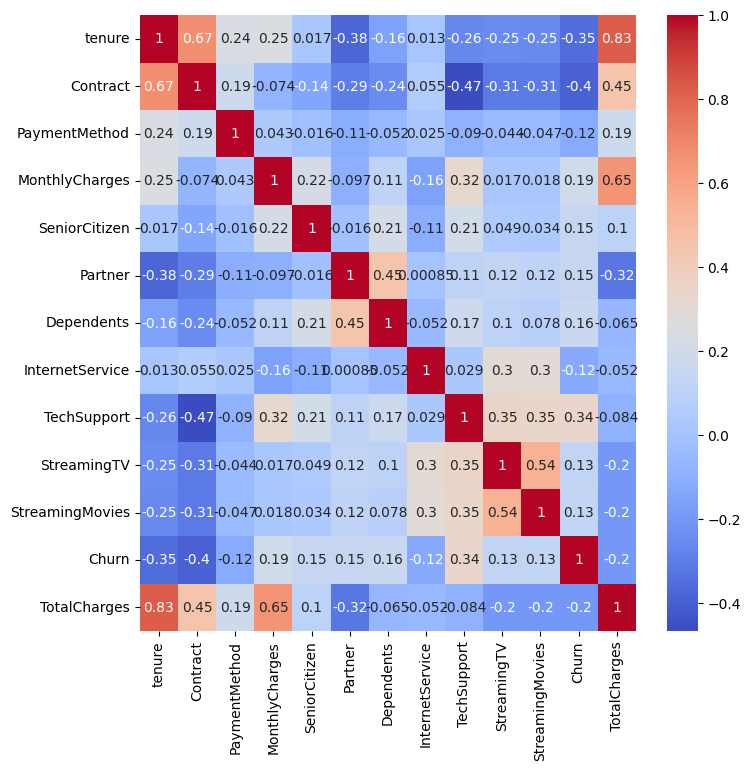

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(churn.corr(), cmap='coolwarm', annot=True)
plt.show()

In [45]:
correlation = {}
for i in churn.columns:
  for j in churn.columns:
    if i != j:
      correlation[i,j] = churn[i].corr(churn[j]), churn[j].corr(churn[i])
print("correlation:", correlation)
print("highly_correlated:", max(correlation))


correlation: {('tenure', 'Contract'): (0.6716065492280612, 0.6716065492280612), ('tenure', 'PaymentMethod'): (0.2435104444384984, 0.2435104444384984), ('tenure', 'MonthlyCharges'): (0.24789985628614988, 0.24789985628614986), ('tenure', 'SeniorCitizen'): (0.016566877681809308, 0.016566877681809308), ('tenure', 'Partner'): (-0.3796974611682926, -0.3796974611682926), ('tenure', 'Dependents'): (-0.1597123312169173, -0.1597123312169173), ('tenure', 'InternetService'): (0.013274087649273942, 0.013274087649273942), ('tenure', 'TechSupport'): (-0.26214304462803667, -0.26214304462803667), ('tenure', 'StreamingTV'): (-0.24503868570619522, -0.24503868570619525), ('tenure', 'StreamingMovies'): (-0.2522202368954502, -0.2522202368954502), ('tenure', 'Churn'): (-0.352228670113078, -0.352228670113078), ('Contract', 'tenure'): (0.6716065492280612, 0.6716065492280612), ('Contract', 'PaymentMethod'): (0.18643980729559625, 0.18643980729559623), ('Contract', 'MonthlyCharges'): (-0.07419466719195408, -0.074

In [42]:
churn.drop(columns = ['TotalCharges'], axis = 1,inplace=True)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churn.drop('Churn', axis=1), churn['Churn'], test_size=0.2, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
churn.shape

(7043, 12)

In [59]:
churn['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
XGB = XGBClassifier(n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)
XGB.fit(X_train,Y_train)
y_preds = XGB.predict(X_test)
print("Accuracy_score:", accuracy_score(Y_test, y_preds))
print("Confusion_matrix:", confusion_matrix(Y_test, y_preds))
print("Classification_report:", classification_report(Y_test, y_preds))


Accuracy_score: 0.808374733853797
Confusion_matrix: [[940  96]
 [174 199]]
Classification_report:               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_preds = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_preds)

print(f"Accuracy Score: {accuracy * 100:.2f}%")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy Score: 80.48%


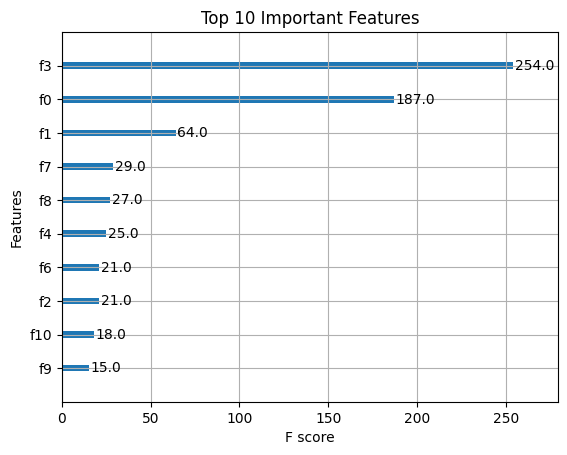

In [73]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(XGB, importance_type='weight',max_num_features=10, title='Top 10 Important Features')
plt.show()


In [74]:
import pickle
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(XGB, file)


In [76]:
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_preds_loaded = loaded_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy_score:", accuracy_score(Y_test, y_preds_loaded))
print("Confusion_matrix:\n", confusion_matrix(Y_test, y_preds_loaded))
print("Classification_report:\n", classification_report(Y_test, y_preds_loaded))


Accuracy_score: 0.808374733853797
Confusion_matrix:
 [[940  96]
 [174 199]]
Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

